In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_post_2Hz_reci = data[(data['Ptl_note']=='E_I_postsynapti_low')&(data['Reci']==1)]
data_post_2Hz_uni = data[(data['Ptl_note']=='E_I_postsynapti_low')&(data['Reci']==0)]

In [4]:
data_post_2Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
121,2017081802,30,2,1,1,0,1,24,"26,27,28,29",16,0,ltd,E_I_postsynapti_low
122,2017082302,22,2,1,1,0,1,5,"7,8,9",16,0,ltd,E_I_postsynapti_low
123,2017082304,22,1,1,1,0,1,"12,13","15,16",16,0,Ltd,E_I_postsynapti_low
124,2017082402,23,2,1,1,0,1,"26, 27","29, 30, 31, 32",16,0,Ltd,E_I_postsynapti_low
125,2017083001,29,2,1,1,0,1,6,"8,9,10",16,0,ltd,E_I_postsynapti_low
126,2017083101,30,2,1,1,0,1,"64,65","69,70,71,72",16,0,ltd,E_I_postsynapti_low


<Container object of 3 artists>

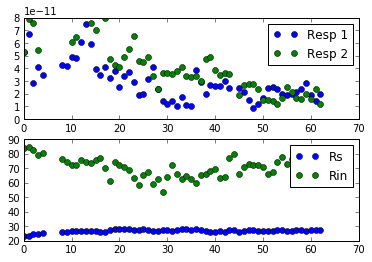

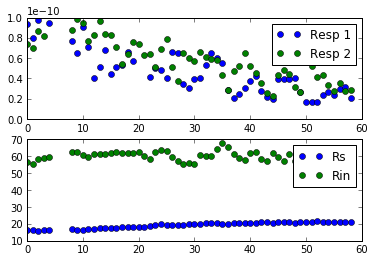

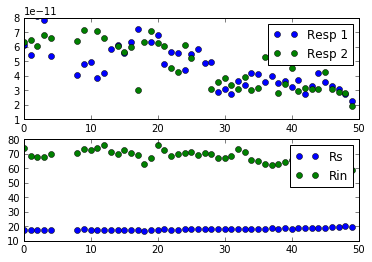

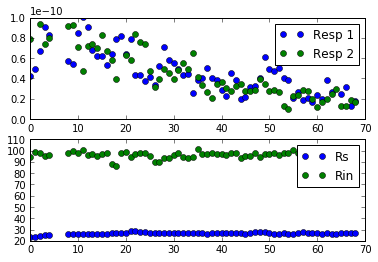

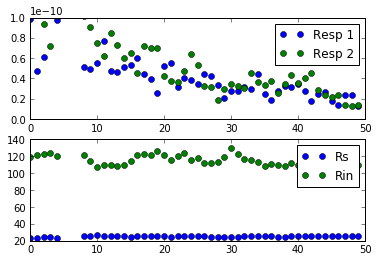

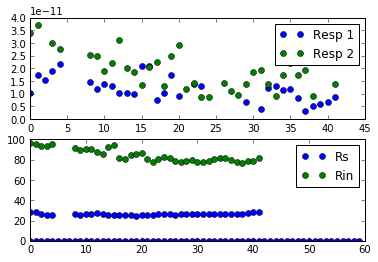

In [5]:
# patch_pip.df_ana(data_post_2Hz_reci,'/data/data_post_2Hz_reci', end_ana=[30,50,40,40,45,30])
patch_pip.df_ana(data_post_2Hz_reci,'/data/data_post_2Hz_reci')
post_2Hz_reci = pd.read_pickle('/data/data_post_2Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(post_2Hz_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [6]:
post_2Hz_reci['Before'].index

Int64Index([121, 122, 123, 124, 125, 126], dtype='int64')

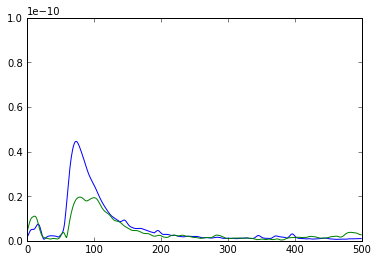

In [7]:
sample_id = 121
plt.plot(np.nanmean(np.vstack(post_2Hz_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(post_2Hz_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))

plt.ylim([0, 1e-10])
with PdfPages('/data/Figure3_2.pdf') as pdf:
    pdf.savefig()

In [8]:
elimi = np.array([30,50,40,40,45,30])
elimi_sr = pd.Series(elimi, index=post_2Hz_reci.index)
post_2Hz_reci['elimi']=elimi_sr

In [10]:
# Add traces with back spontaneous recording
spon_elimi_bef = {}
spon_elimi_bef[121] = [0, 1, 15, 20, 21, 22, 25, 32, 39, 42, 78]
spon_elimi_bef[122] = [0, 3, 24, 25, 26, 37, 47, 50]
spon_elimi_bef[123] = [16, 18, 19]
spon_elimi_bef[124] = [0, 2, 4, 10, 35, 54]
spon_elimi_bef[125] = [0, 9, 20, 22, 25, 31, 35, 49, 52, 56, 59]
spon_elimi_bef[126] = [3, 5, 12, 13, 14, 15, 16, 19, 24, 44, 50, 67, 68, 70]

In [11]:
post_2Hz_reci['spon_elimi_bef'] = pd.Series(spon_elimi_bef, index=post_2Hz_reci.index)

In [12]:
post_2Hz_reci.to_pickle('/data/ana_post_2Hz_reci')